In [4]:
# Import necessary libraries
!pip install ultralytics
!pip install gradio
!pip install pandas
!pip install pillow
!pip install numpy

In [5]:
# Import necessary libraries
from ultralytics import YOLO  # Import YOLO model from Ultralytics
from ultralytics.engine.results import Results  # Import Results from Ultralytics
import gradio as gr  # Import Gradio for building an interface
import pandas


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128


image 1/1 /content/mawa.jpeg: 192x640 29 faces, 31.8ms
Speed: 12.6ms preprocess, 31.8ms inference, 12.9ms postprocess per image at shape (1, 3, 192, 640)


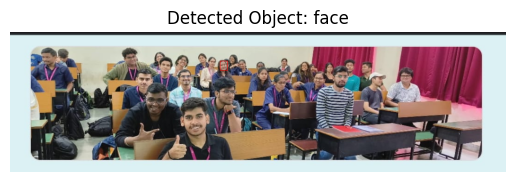

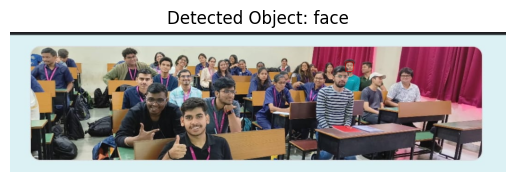

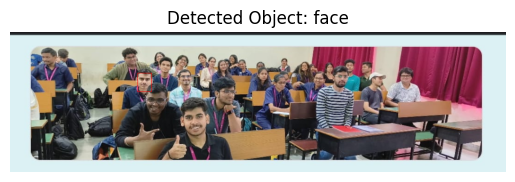

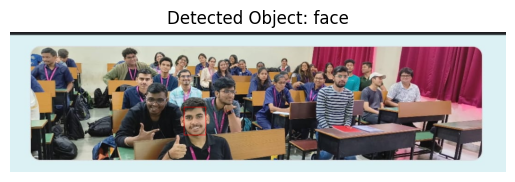

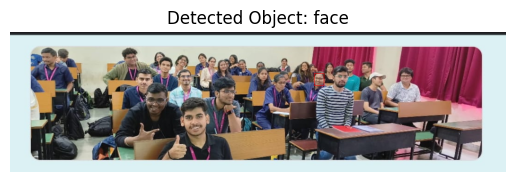

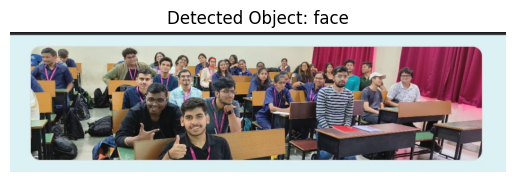

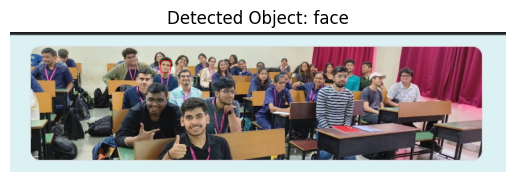

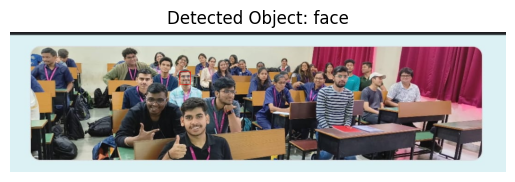

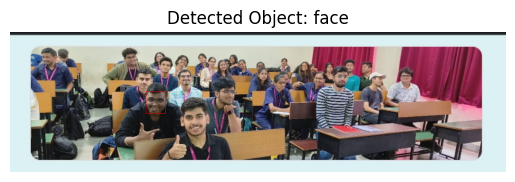

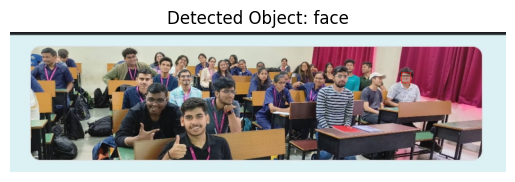

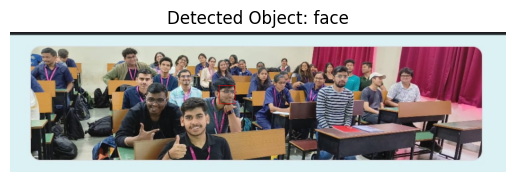

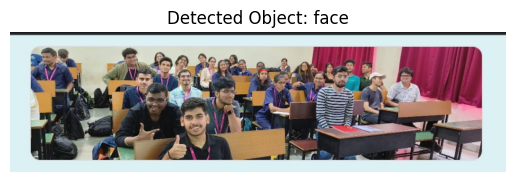

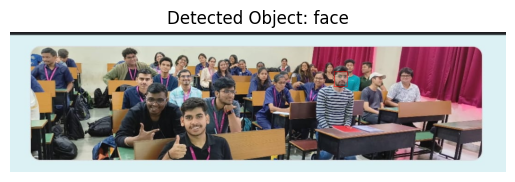

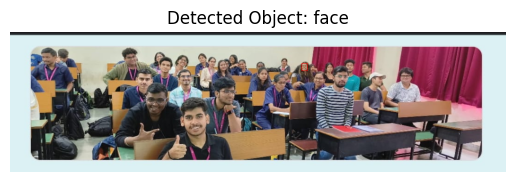

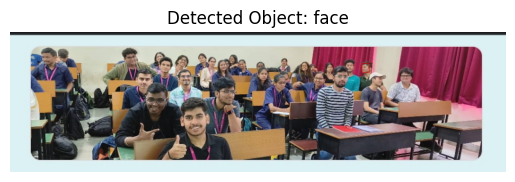

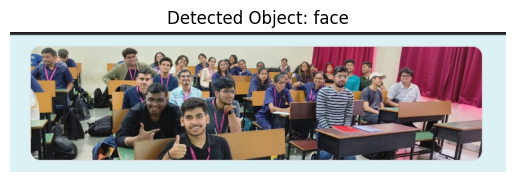

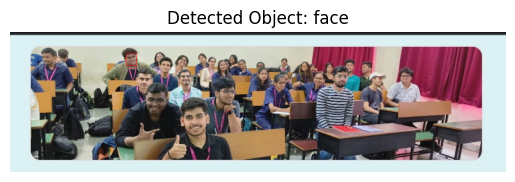

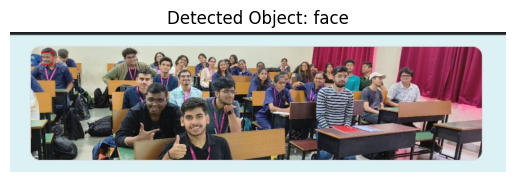

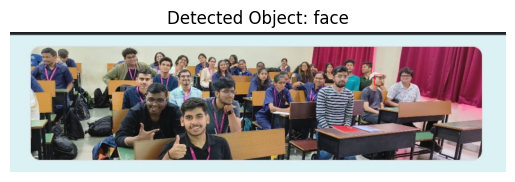

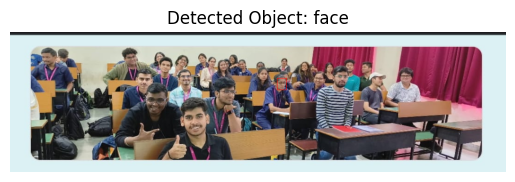

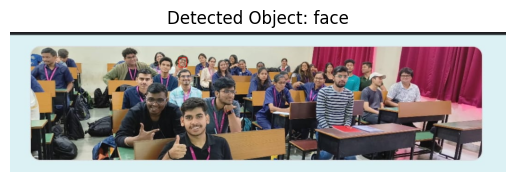

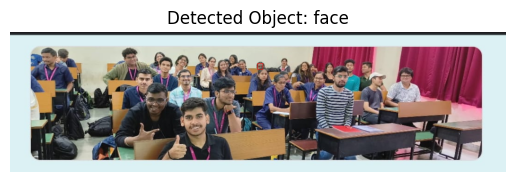

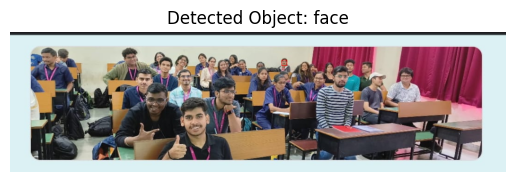

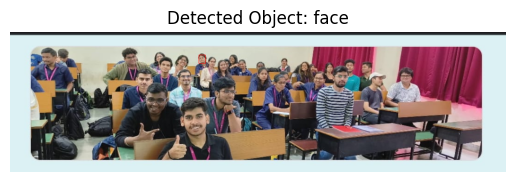

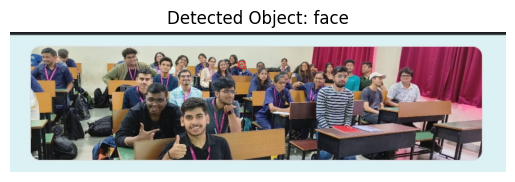

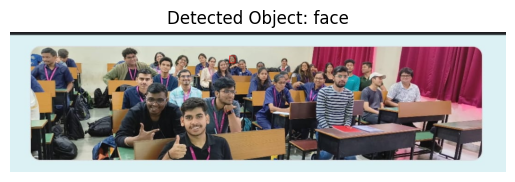

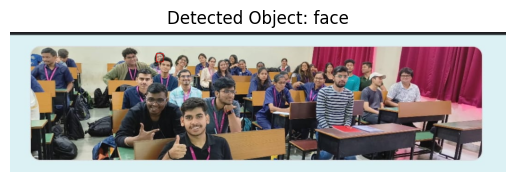

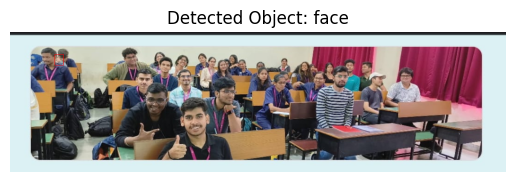

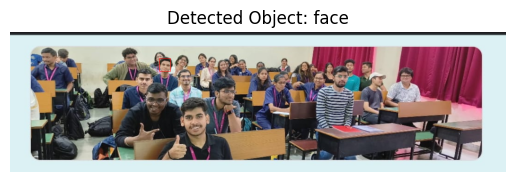

In [51]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

# Load the image
image = Image.open("mawa.jpeg")

# Fectching the names of detected objects
result: Results = model.predict("mawa.jpeg")[0]
detected_objects = {}

# Create a dictionary to store object names and their corresponding bounding boxes
for idx, box in enumerate(result.boxes.data):
    object_name = result.names.get(box[-1].item())
    x1, y1, x2, y2 = box[:4]  # Extract bounding box coordinates
    bounding_box = [(x1, y1), (x2, y1), (x2, y2), (x1, y2), (x1, y1)]  # Define bounding box as a list of coordinates

    # Create a variable with a dynamic name
    variable_name = f"detected_object_{idx}"
    detected_objects[variable_name] = (object_name, bounding_box)

# Now you have a dictionary 'detected_objects' where keys are variable names and values are tuples of (object_name, bounding_box)

# Visualize each detected object
for var_name, (object_name, bounding_box) in detected_objects.items():
    image_with_boxes = image.copy()
    draw = ImageDraw.Draw(image_with_boxes)
    draw.polygon(bounding_box, outline='red')  # Draw bounding box with a red outline
    plt.figure()
    plt.title(f"Detected Object: {object_name}")
    plt.imshow(image_with_boxes)
    plt.axis('off')
    plt.show()



image 1/1 /content/mawa.jpeg: 192x640 29 faces, 7.0ms
Speed: 1.4ms preprocess, 7.0ms inference, 1.8ms postprocess per image at shape (1, 3, 192, 640)


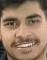

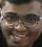

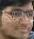

In [50]:
from PIL import Image
import os

# Load the image
image = Image.open("mawa.jpeg")

# Fectching the names of detected objects
results: Results = model.predict("mawa.jpeg")[0]
detected_objects = []

if hasattr(results, 'boxes') and hasattr(results, 'names'):
    for box in results.boxes.xyxy:  # Use .xyxy to access the bounding box coordinates
        object_id = int(box[-1])  # Get the object ID
        object_name = results.names.get(object_id)  # Get the object name
        x1, y1, x2, y2 = int(box[0]), int(box[1]), int(box[2]), int(box[3])  # Extract bounding box coordinates

        detected_objects.append((object_name, (x1, y1, x2, y2)))

# Create a directory to save the cropped objects
os.makedirs("cropped_objects", exist_ok=True)

# Crop and save each detected object
for i, (object_name, (x1, y1, x2, y2)) in enumerate(detected_objects):
    # Crop the detected object
    object_image = image.crop((x1, y1, x2, y2))

    # Save the cropped object
    object_image.save(f"cropped_objects/object_{i}.jpg")

# Display the saved images
import IPython.display as display

for i in range(len(detected_objects)):
    display.display(Image.open(f"cropped_objects/object_{i}.jpg"))
